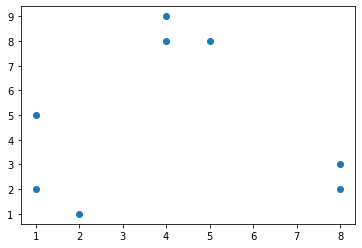

G:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


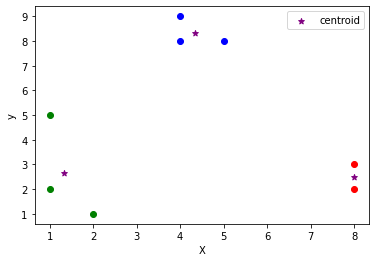

In [31]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import pandas as pd 

d = {'X': [1, 1, 5, 4, 4, 8, 8, 2], 'y': [5,2,8,8,9,3,2,1]}
df = pd.DataFrame(data=d)
df

# plot
plt.scatter(
   df['X'],df['y']
)
plt.show()



# train K-Means clustering
km = KMeans(
    n_clusters=3
)
y_km = km.fit_predict(df[['X','y']])

df['cluster'] = y_km
df.head()

df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.X,df1['y'],color='green')
plt.scatter(df2.X,df2['y'],color='red')
plt.scatter(df3.X,df3['y'],color='blue')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')

plt.xlabel('X')
plt.ylabel('y')
plt.legend()

k_rng = range(1,9)
sse = []
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['X','y']])
    sse.append(km.inertia_)

In [32]:
sse

[126.375,
 62.75,
 11.166666666666668,
 2.8333333333333335,
 1.8333333333333335,
 1.0,
 0.5,
 0.0]

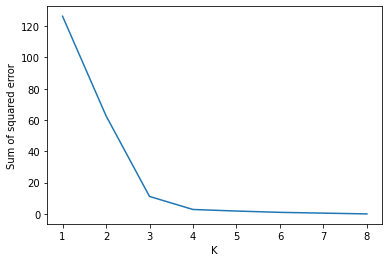

In [34]:
plt.xlabel('K')
plt.ylabel("Sum of squared error")
plt.plot(k_rng,sse)